# Import

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [62]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [63]:
strength = pd.read_excel(file_path, sheet_name="strengths")

In [64]:
display(strength.head())

,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [65]:
import pandas as pd

file_path = "performance_employees_adjusted.xlsx"
base = pd.read_excel(file_path)

# Ambil hanya kolom yang dibutuhkan
base = base[['employee_id', 'rating', 'year']]

In [66]:
display(base.shape)
display(base)

(8084, 3)

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100002,2.0,2021
2,EMP100005,NaN,2021
3,EMP100006,4.0,2021
4,EMP100007,4.0,2021
...,...,...,...
8079,DUP1942,5.0,2025
8080,DUP2096,3.0,2025
8081,DUP4177,2.0,2025
8082,DUP9801,5.0,2025


# EDA

# Outlier Score

### Performance

In [67]:
display(strength.shape)
display(strength)

(28140, 3)

,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative
...,...,...,...
28135,DUP1942,14,Woo
28136,DUP2096,14,Consistency
28137,DUP4177,14,Relator
28138,DUP9801,14,Ideation


In [68]:
unique_themes = strength['theme'].unique()
print(unique_themes)


[nan 'Responsibility' 'Restorative' 'Belief' 'Deliberative' 'Input'
 'Connectedness' 'Analytical' 'Activator' 'Empathy' 'Adaptability'
 'Individualization' 'Harmony' 'Strategic' 'Includer' 'Significance'
 'Discipline' 'Arranger' 'Competition' 'Maximizer' 'Futuristic' 'Achiever'
 'Command' 'Woo' 'Intellection' 'Learner' 'Focus' 'Ideation' 'Relator'
 'Self-Assurance' 'Communication' 'Developer' 'Context' 'Consistency'
 'Positivity']


In [69]:
# Ubah data Strength ke format wide
strength_wide = (
    strength
    .pivot(index='employee_id', columns='rank', values='theme')
    .reset_index()
)

# Ubah nama kolom agar lebih informatif
strength_wide.columns = ['employee_id'] + [f'strength_rank_{int(c)}' for c in strength_wide.columns[1:]]

# Lihat hasil
display(strength_wide.shape)
display(strength_wide.head())


(2010, 15)

,employee_id,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14
0,DUP1942,Learner,Maximizer,Ideation,Harmony,Restorative,Belief,Input,Significance,Empathy,Connectedness,Positivity,Communication,Individualization,Woo
1,DUP2096,Command,Significance,Competition,Discipline,Woo,Activator,NaN,Strategic,Ideation,Deliberative,Achiever,Learner,NaN,Consistency
2,DUP2722,Individualization,Self-Assurance,NaN,Analytical,Input,Deliberative,NaN,Activator,Belief,Developer,Positivity,Maximizer,Significance,Connectedness
3,DUP3015,Responsibility,Context,Includer,Communication,Ideation,Command,Learner,Intellection,Empathy,Strategic,Deliberative,Arranger,Relator,Positivity
4,DUP3452,Developer,Arranger,Self-Assurance,Futuristic,Learner,Maximizer,Context,Significance,Adaptability,Connectedness,Ideation,Communication,Relator,Strategic


In [70]:
# pastikan kolom employee_id sama tipe datanya
base['employee_id'] = base['employee_id'].astype(str)
strength_wide['employee_id'] = strength_wide['employee_id'].astype(str)

# gabungkan ke base
merged_df = base.merge(strength_wide, on='employee_id', how='left')

# cek hasil
display(merged_df.shape)
display(merged_df.head())


(8084, 17)

,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,strength_rank_4,strength_rank_5,strength_rank_6,strength_rank_7,strength_rank_8,strength_rank_9,strength_rank_10,strength_rank_11,strength_rank_12,strength_rank_13,strength_rank_14
0,EMP100000,2.0,2021,NaN,Adaptability,Context,Competition,Activator,Positivity,Significance,Empathy,Ideation,Developer,Communication,Command,Analytical,Intellection
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,Includer,Command,NaN,Futuristic,Focus,NaN,NaN,Analytical,NaN,NaN,Positivity
2,EMP100005,NaN,2021,Input,Relator,Woo,Deliberative,Consistency,NaN,Includer,Empathy,Restorative,Responsibility,Belief,Learner,Arranger,Significance
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,Maximizer,Self-Assurance,Deliberative,NaN,Achiever,Intellection,Consistency,Discipline,Relator,Arranger,Learner
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,Communication,Focus,Positivity,Adaptability,Maximizer,Individualization,Context,Includer,Belief,Discipline,Woo


In [71]:
merged_df = merged_df[['employee_id', 'rating', 'year', 'strength_rank_1', 'strength_rank_2', 'strength_rank_3']]
print(merged_df.dtypes)


employee_id         object
rating             float64
year                 int64
strength_rank_1     object
strength_rank_2     object
strength_rank_3     object
dtype: object


In [72]:
# Buat kolom penanda high performer
merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)


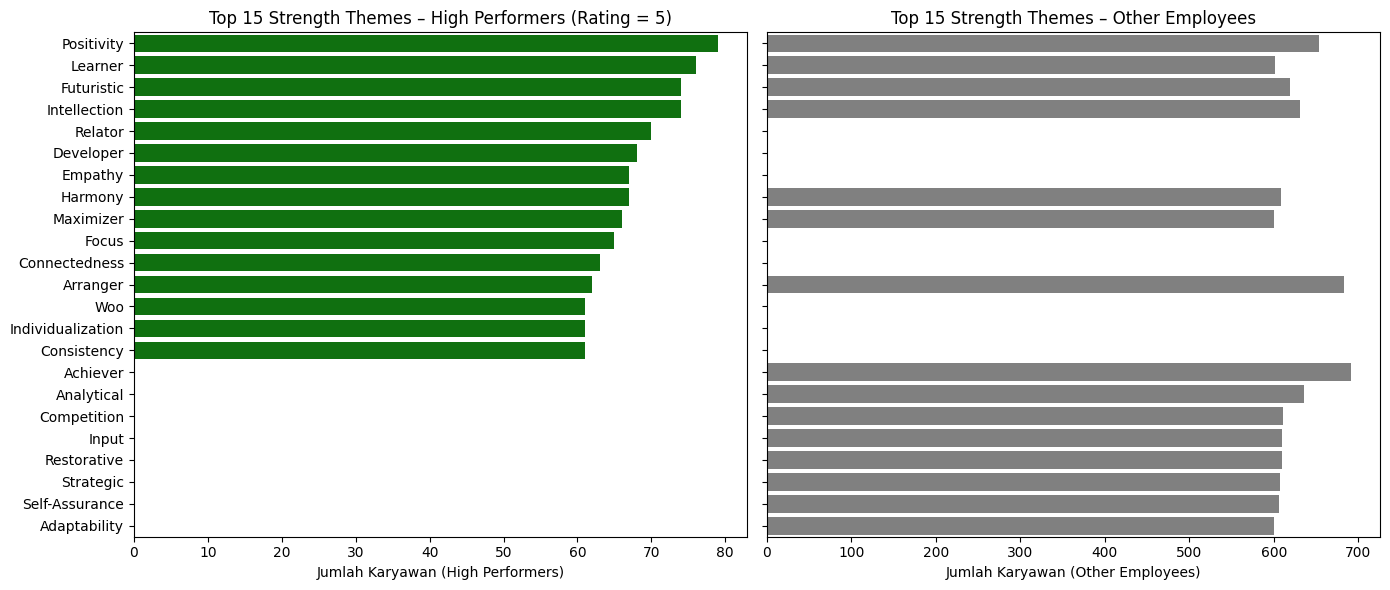

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pastikan kolom 'is_high' sudah ada (rating == 5 → 1)
# merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)

# Ambil hanya kolom strength rank
strength_cols = [c for c in merged_df.columns if c.startswith('strength_rank_')]

# Ubah dari wide ke long agar bisa dihitung per tema
strength_long = merged_df.melt(
    id_vars=['employee_id', 'is_high'],
    value_vars=strength_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

# Hitung frekuensi tiap tema per kelompok
theme_freq = (
    strength_long.groupby(['is_high', 'theme'])
    .size()
    .reset_index(name='count')
)

# Normalisasi agar bisa dibandingkan proporsinya
theme_freq['percentage'] = theme_freq.groupby('is_high')['count'].transform(lambda x: x / x.sum() * 100)
theme_freq_high = theme_freq[theme_freq['is_high'] == 1].sort_values('percentage', ascending=False).head(15)
theme_freq_other = theme_freq[theme_freq['is_high'] == 0].sort_values('percentage', ascending=False).head(15)

# Ambil 15 tema paling sering muncul berdasarkan JUMLAH (bukan persentase)
theme_freq_high = (
    theme_freq[theme_freq['is_high'] == 1]
    .sort_values('count', ascending=False)
    .head(15)
)
theme_freq_other = (
    theme_freq[theme_freq['is_high'] == 0]
    .sort_values('count', ascending=False)
    .head(15)
)

# Buat 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(
    data=theme_freq_high,
    y='theme', x='count', ax=axes[0], color='green'
)
axes[0].set_title('Top 15 Strength Themes – High Performers (Rating = 5)')
axes[0].set_xlabel('Jumlah Karyawan (High Performers)')
axes[0].set_ylabel('')

sns.barplot(
    data=theme_freq_other,
    y='theme', x='count', ax=axes[1], color='gray'
)
axes[1].set_title('Top 15 Strength Themes – Other Employees')
axes[1].set_xlabel('Jumlah Karyawan (Other Employees)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [74]:
strength_cols

['strength_rank_1', 'strength_rank_2', 'strength_rank_3']

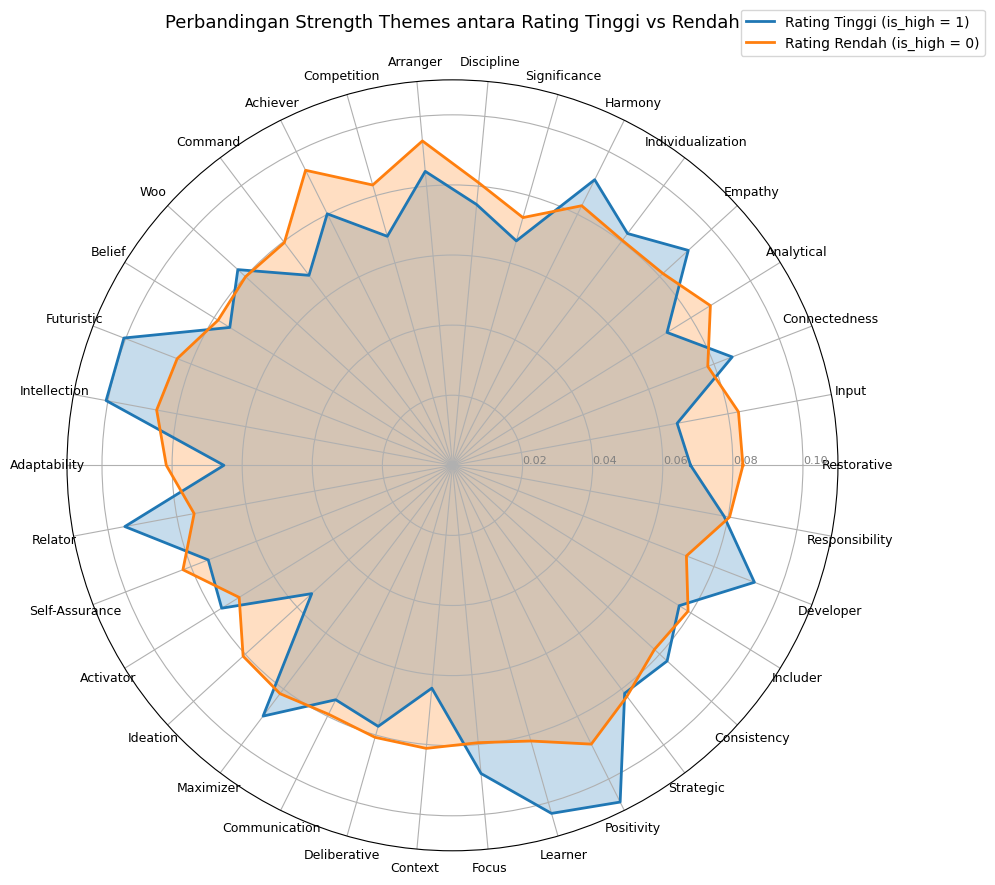

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil semua nama tema unik dari kolom strength_rank

themes = merged_df[strength_cols].melt(value_name='theme')['theme'].dropna().unique()

# Buat kolom 0/1 apakah tema tersebut muncul di 3 besar seseorang
for t in themes:
    merged_df[t] = merged_df[strength_cols].eq(t).any(axis=1).astype(int)

# Hitung rata-rata tiap theme untuk dua kelompok
mean_high = merged_df[merged_df['is_high'] == 1][themes].mean()
mean_low = merged_df[merged_df['is_high'] == 0][themes].mean()

# Siapkan data
labels = np.array(themes)
stats_high = mean_high.values
stats_low = mean_low.values

# Radar chart butuh titik awal & penutup sama
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
stats_high = np.concatenate((stats_high, [stats_high[0]]))
stats_low = np.concatenate((stats_low, [stats_low[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Buat radar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot dua grup
ax.plot(angles, stats_high, linewidth=2, label='Rating Tinggi (is_high = 1)')
ax.fill(angles, stats_high, alpha=0.25)

ax.plot(angles, stats_low, linewidth=2, label='Rating Rendah (is_high = 0)')
ax.fill(angles, stats_low, alpha=0.25)

# Label & tampilan
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=8)
plt.title("Perbandingan Strength Themes antara Rating Tinggi vs Rendah", size=13, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


C:\Users\fajar\AppData\Local\Temp\ipykernel_15896\838770780.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_rating.values, y=corr_with_rating.index, palette='crest')


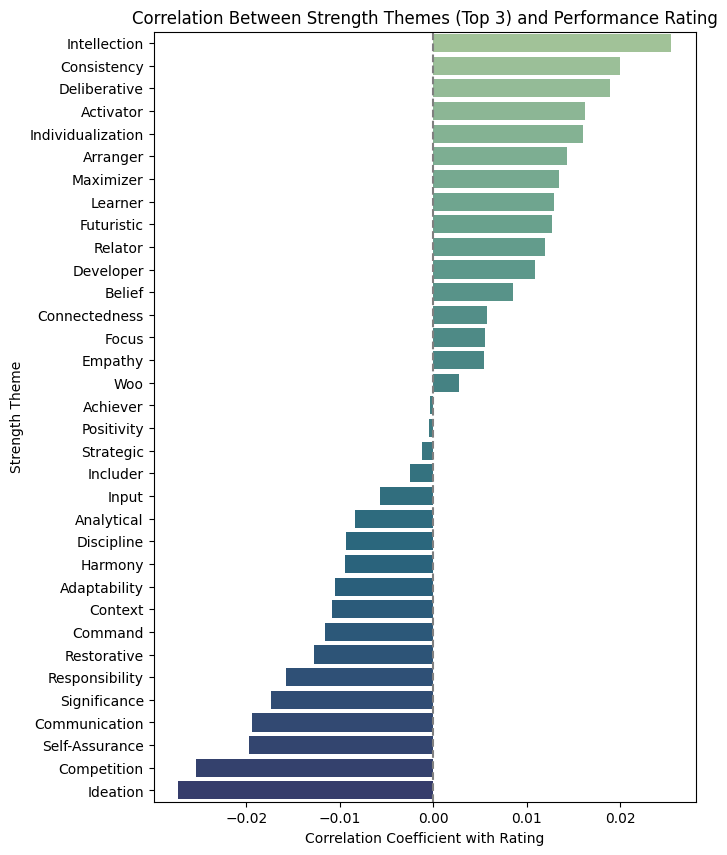

Top 10 Positive Correlations with Rating:


Intellection         0.025467
Consistency          0.019998
Deliberative         0.018933
Activator            0.016249
Individualization    0.016042
Arranger             0.014351
Maximizer            0.013401
Learner              0.012916
Futuristic           0.012712
Relator              0.011944
Name: rating, dtype: float64


Top 10 Negative Correlations with Rating:


Adaptability     -0.010507
Context          -0.010870
Command          -0.011638
Restorative      -0.012763
Responsibility   -0.015760
Significance     -0.017371
Communication    -0.019359
Self-Assurance   -0.019686
Competition      -0.025408
Ideation         -0.027290
Name: rating, dtype: float64

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bentuk long format
strength_long = merged_df.melt(
    id_vars=['employee_id', 'rating'],
    value_vars=strength_cols,
    var_name='rank',
    value_name='theme'
).dropna(subset=['theme'])

# Buat binary matrix: 1 jika tema ada di Top 3, 0 jika tidak
binary_matrix = (
    strength_long
    .pivot_table(index='employee_id', columns='theme', values='rank', aggfunc='count', fill_value=0)
    .reset_index()
)

# Gabungkan kembali dengan rating karyawan
binary_matrix = binary_matrix.merge(merged_df[['employee_id', 'rating']], on='employee_id')

# Hitung korelasi antar tema dengan rating
corr_with_rating = binary_matrix.corr(numeric_only=True)['rating'].drop('rating').sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(7,10))
sns.barplot(x=corr_with_rating.values, y=corr_with_rating.index, palette='crest')
plt.title('Correlation Between Strength Themes (Top 3) and Performance Rating')
plt.xlabel('Correlation Coefficient with Rating')
plt.ylabel('Strength Theme')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# Tampilkan tabel korelasi tertinggi dan terendah
print("Top 10 Positive Correlations with Rating:")
display(corr_with_rating.head(10))

print("\nTop 10 Negative Correlations with Rating:")
display(corr_with_rating.tail(10))


C:\Users\fajar\AppData\Local\Temp\ipykernel_15896\4163597805.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=theme_gap, y=theme_gap.index, x='Gap', palette='coolwarm')


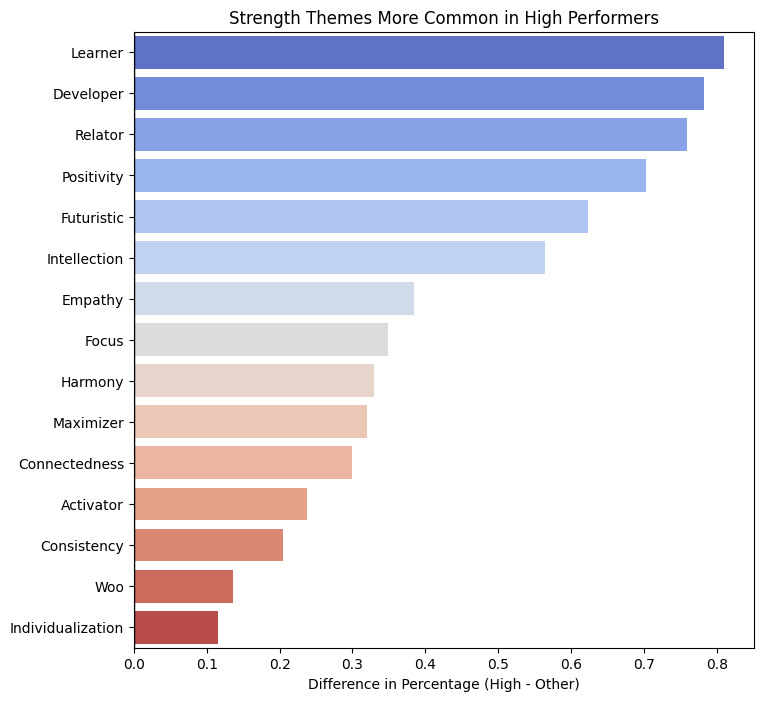

In [77]:
# Pivot agar tiap tema punya dua kolom: high vs other
theme_gap = theme_freq.pivot(index='theme', columns='is_high', values='percentage').fillna(0)
theme_gap.columns = ['Other', 'High']
theme_gap['Gap'] = theme_gap['High'] - theme_gap['Other']
theme_gap = theme_gap.sort_values('Gap', ascending=False).head(15)

# Visualisasi gap
plt.figure(figsize=(8, 8))
sns.barplot(data=theme_gap, y=theme_gap.index, x='Gap', palette='coolwarm')
plt.title('Strength Themes More Common in High Performers')
plt.xlabel('Difference in Percentage (High - Other)')
plt.ylabel('')
plt.axvline(0, color='black', linewidth=1)
plt.show()


In [78]:
# Buat daftar semua tema unik
themes = pd.unique(strength_long['theme'].dropna())

# One-hot encode: buat kolom tema, isi 1 kalau karyawan punya tema tsb
for theme in themes:
    merged_df[theme] = merged_df[strength_cols].apply(lambda row: theme in row.values, axis=1).astype(int)

# Cek hasil
merged_df.head()


,employee_id,rating,year,strength_rank_1,strength_rank_2,strength_rank_3,is_high,Restorative,Input,Connectedness,Analytical,Empathy,Individualization,Harmony,Significance,Discipline,Arranger,Competition,Achiever,Command,Woo,Belief,Futuristic,Intellection,Adaptability,Relator,Self-Assurance,Activator,Ideation,Maximizer,Communication,Deliberative,Context,Focus,Learner,Positivity,Strategic,Consistency,Includer,Developer,Responsibility
0,EMP100000,2.0,2021,NaN,Adaptability,Context,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,EMP100002,2.0,2021,Restorative,Maximizer,Woo,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,EMP100005,NaN,2021,Input,Relator,Woo,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,EMP100006,4.0,2021,Input,Analytical,Responsibility,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,EMP100007,4.0,2021,Connectedness,Strategic,Consistency,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [79]:
themes

array(['Restorative', 'Input', 'Connectedness', 'Analytical', 'Empathy',
       'Individualization', 'Harmony', 'Significance', 'Discipline',
       'Arranger', 'Competition', 'Achiever', 'Command', 'Woo', 'Belief',
       'Futuristic', 'Intellection', 'Adaptability', 'Relator',
       'Self-Assurance', 'Activator', 'Ideation', 'Maximizer',
       'Communication', 'Deliberative', 'Context', 'Focus', 'Learner',
       'Positivity', 'Strategic', 'Consistency', 'Includer', 'Developer',
       'Responsibility'], dtype=object)

In [80]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ================================================
# 🔹 1. Pastikan variabel target (is_high)
# ================================================
# rating == 5 → 1, selain itu → 0
merged_df['is_high'] = (merged_df['rating'] == 5).astype(int)

# ================================================
# 🔹 2. Pilih variabel independen (themes)
# ================================================
# pastikan list themes berisi nama theme unik (misal Strength themes)
themes = [
    'Restorative', 'Input', 'Connectedness', 'Analytical', 'Empathy',
    'Individualization', 'Harmony', 'Significance', 'Discipline', 'Arranger',
    'Competition', 'Achiever', 'Command', 'Woo', 'Belief', 'Futuristic',
    'Intellection', 'Adaptability', 'Relator', 'Self-Assurance', 'Activator',
    'Ideation', 'Maximizer', 'Communication', 'Deliberative', 'Context',
    'Focus', 'Learner', 'Positivity', 'Strategic', 'Consistency', 'Includer',
    'Developer', 'Responsibility'
]

# ================================================
# 🔹 3. Siapkan X dan y
# ================================================
X = merged_df[themes]
y = merged_df['is_high']

# Tambahkan konstanta (intercept)
X_const = sm.add_constant(X)

# ================================================
# 🔹 4. Fit model Logistik Biner
# ================================================
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# ================================================
# 🔹 5. Tampilkan summary lengkap
# ================================================
print(result.summary())

# ================================================
# 🔹 6. Hitung Odds Ratio (exp dari koefisien)
# ================================================
odds_ratios = np.exp(result.params)
odds_ratios = odds_ratios.sort_values(ascending=False)

print("\n=== Top Odds Ratios ===")
print(odds_ratios)

# ================================================
# 🔹 7. (Opsional) Simpan hasil ke dataframe
# ================================================
summary_df = pd.DataFrame({
    'Theme': result.params.index,
    'Coefficient': result.params.values,
    'Std_Error': result.bse.values,
    'p_value': result.pvalues.values,
    'Odds_Ratio': odds_ratios.values
}).sort_values('Odds_Ratio', ascending=False)

# tampilkan 10 teratas
print("\n=== Top 10 Predictors of High Rating (is_high=1) ===")
print(summary_df.head(10))


Optimization terminated successfully.
         Current function value: 0.301772
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                 8084
Model:                          Logit   Df Residuals:                     8049
Method:                           MLE   Df Model:                           34
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                 0.01041
Time:                        18:39:49   Log-Likelihood:                -2439.5
converged:                       True   LL-Null:                       -2465.2
Covariance Type:            nonrobust   LLR p-value:                   0.02859
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9919      0.227     -8.777      0.000      -2.437      -1.547
Restorat

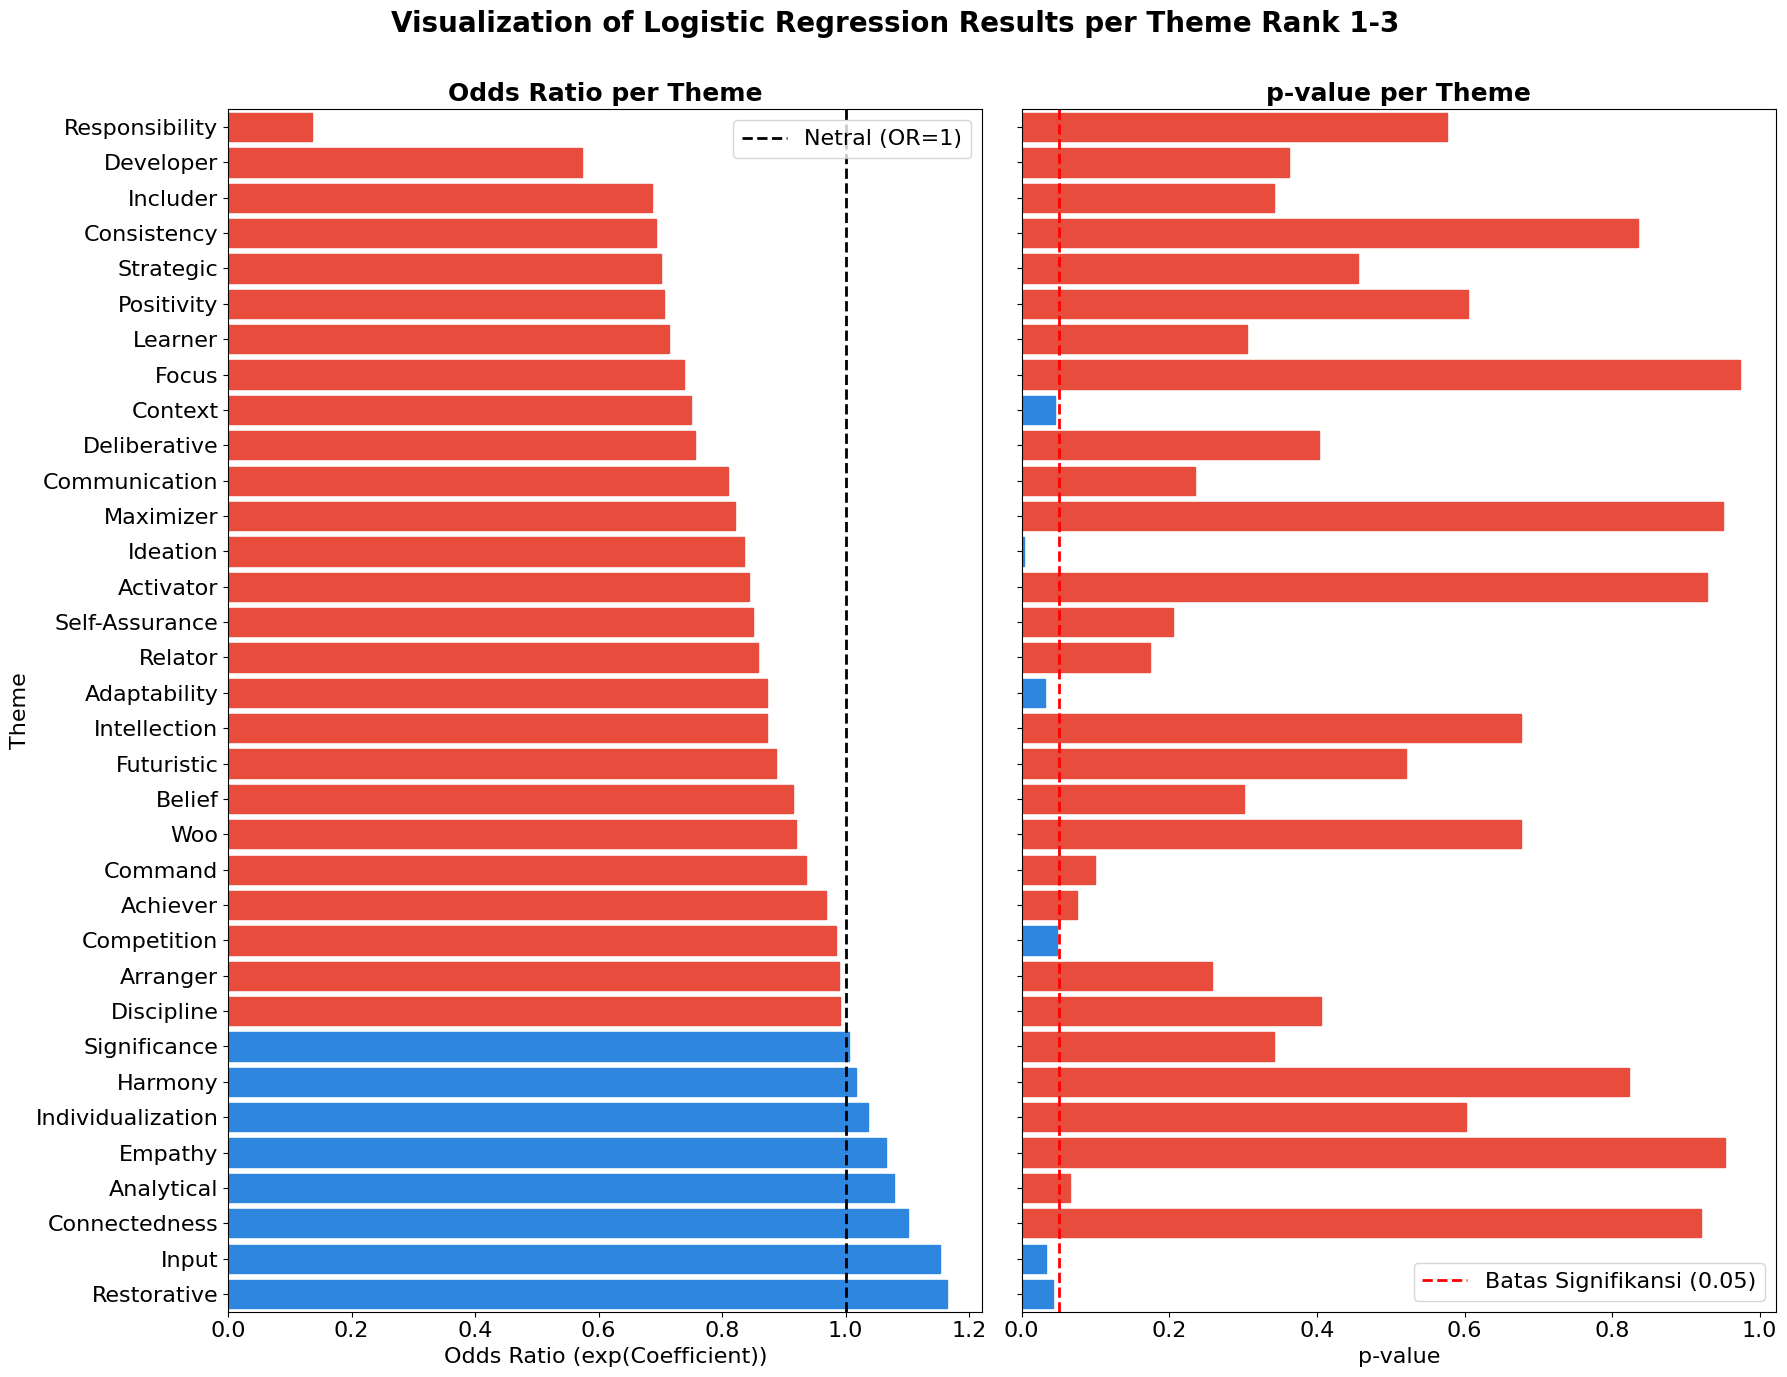

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================
# 🔹 Visualisasi Odds Ratio & p-value (warna berbeda)
# ================================================
viz_df = summary_df[summary_df['Theme'] != 'const'].copy()
viz_df = viz_df.sort_values('Odds_Ratio', ascending=True)

# Warna Odds Ratio: biru (baik, >1) dan merah (buruk, <1)
or_colors = ['#2E86DE' if x > 1 else '#E74C3C' for x in viz_df['Odds_Ratio']]

# Warna p-value: biru (signifikan), merah (tidak signifikan)
pval_colors = ['#2E86DE' if p < 0.05 else '#E74C3C' for p in viz_df['p_value']]

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 14), sharey=True)

# -----------------------------------------------
# 🔸 Subplot 1: Odds Ratio
# -----------------------------------------------
bars1 = sns.barplot(x='Odds_Ratio', y='Theme', data=viz_df, ax=axes[0])
for bar, color in zip(bars1.patches, or_colors):
    bar.set_color(color)

axes[0].axvline(1, color='black', linestyle='--', linewidth=2, label='Netral (OR=1)')
axes[0].set_title('Odds Ratio per Theme', fontsize=18, weight='bold')
axes[0].set_xlabel('Odds Ratio (exp(Coefficient))', fontsize=16)
axes[0].set_ylabel('Theme', fontsize=16)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].legend(fontsize=16)

# -----------------------------------------------
# 🔸 Subplot 2: p-value (warna berdasarkan signifikansi)
# -----------------------------------------------
bars2 = sns.barplot(x='p_value', y='Theme', data=viz_df, ax=axes[1])
for bar, color in zip(bars2.patches, pval_colors):
    bar.set_color(color)

axes[1].axvline(0.05, color='red', linestyle='--', linewidth=2, label='Batas Signifikansi (0.05)')
axes[1].set_title('p-value per Theme', fontsize=18, weight='bold')
axes[1].set_xlabel('p-value', fontsize=16)
axes[1].set_ylabel('')
axes[1].tick_params(axis='both', labelsize=16)
axes[1].legend(fontsize=16)

# Tata letak
plt.suptitle('Visualization of Logistic Regression Results per Theme Rank 1-3', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


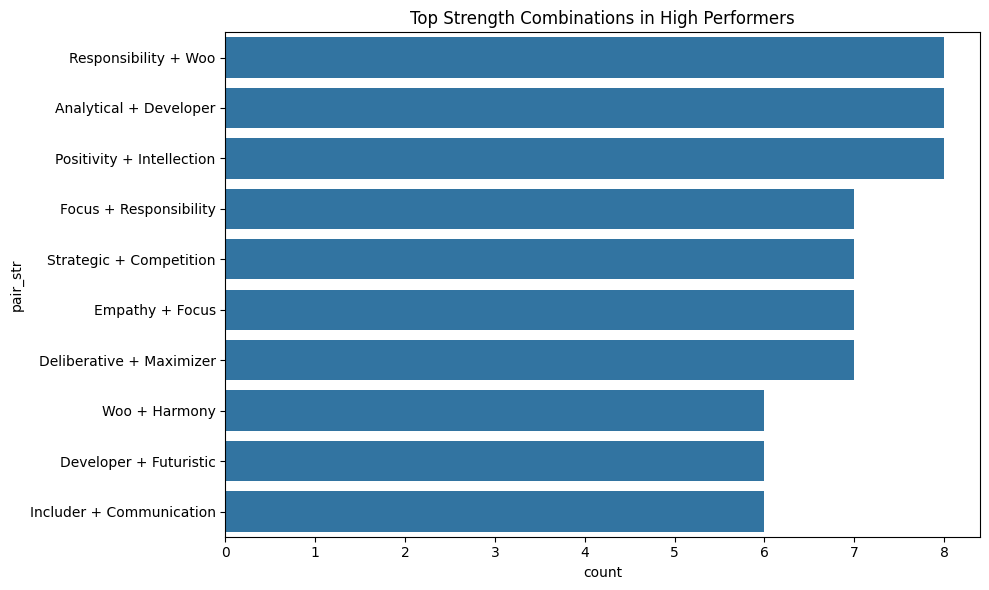

In [58]:
# Analisis kombinasi strength yang sering muncul bersama pada high performers
from itertools import combinations
from collections import Counter

# Cari pola kombinasi 2 strength yang sering muncul
high_performers = merged_df[merged_df['is_high'] == 1]
strength_pairs = []

for idx, row in high_performers.iterrows():
    strengths = [row[c] for c in strength_cols if pd.notna(row[c])]
    pairs = list(combinations(strengths, 2))
    strength_pairs.extend(pairs)

# Hitung frekuensi kombinasi
pair_counts = Counter(strength_pairs)
common_pairs = pair_counts.most_common(10)

# Visualisasi
pairs_df = pd.DataFrame(common_pairs, columns=['pair', 'count'])
pairs_df['pair_str'] = pairs_df['pair'].apply(lambda x: f"{x[0]} + {x[1]}")

plt.figure(figsize=(10, 6))
sns.barplot(data=pairs_df, y='pair_str', x='count')
plt.title('Top Strength Combinations in High Performers')
plt.tight_layout()
plt.show()

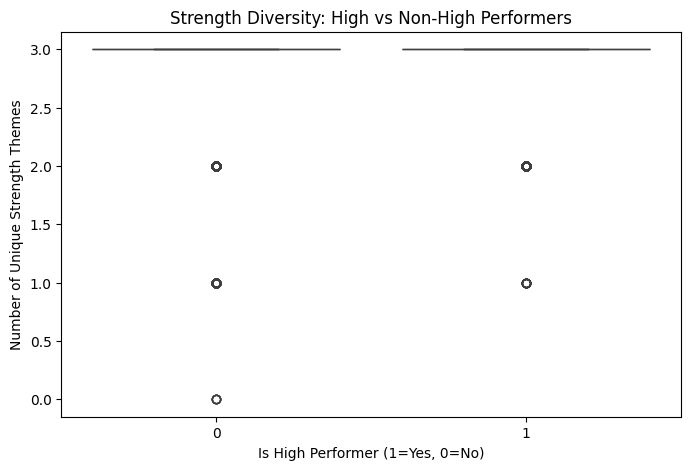

Diversity U-test: p-value = 0.2714


In [59]:
# Hitung diversity of strengths per employee
def calculate_strength_diversity(row):
    strengths = [row[c] for c in strength_cols if pd.notna(row[c])]
    return len(set(strengths))

merged_df['strength_diversity'] = merged_df.apply(calculate_strength_diversity, axis=1)

# Bandingkan diversity antara high vs non-high performers
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='is_high', y='strength_diversity')
plt.title('Strength Diversity: High vs Non-High Performers')
plt.xlabel('Is High Performer (1=Yes, 0=No)')
plt.ylabel('Number of Unique Strength Themes')
plt.show()

# Test signifikansi
from scipy.stats import mannwhitneyu
high_div = merged_df[merged_df['is_high'] == 1]['strength_diversity']
other_div = merged_df[merged_df['is_high'] == 0]['strength_diversity']
stat, p_val = mannwhitneyu(high_div, other_div)
print(f"Diversity U-test: p-value = {p_val:.4f}")

C:\Users\fajar\AppData\Local\Temp\ipykernel_15896\3364246501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_odds, y='Theme', x='Odds_Ratio', ax=axes[0,1], palette='viridis')
C:\Users\fajar\AppData\Local\Temp\ipykernel_15896\3364246501.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_performance.index, y=cluster_performance.values, ax=axes[1,1], palette='coolwarm')


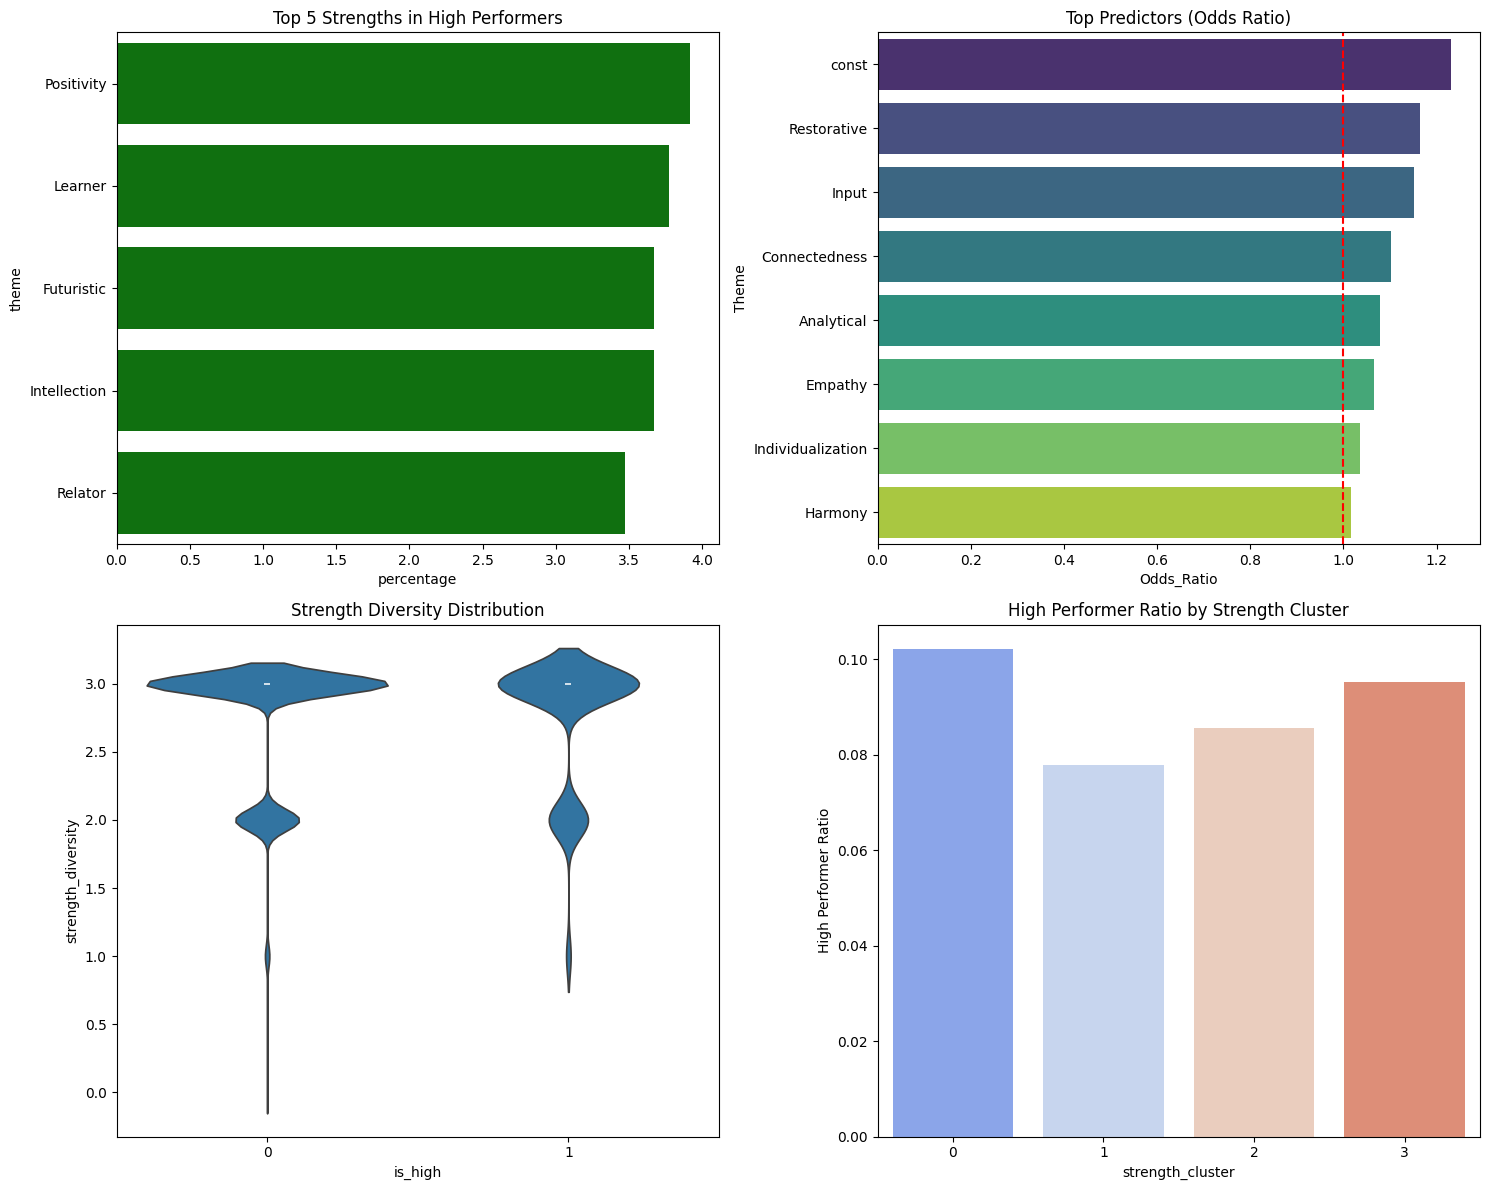

In [60]:
# Buat summary dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Top differentiating strengths
top_5_high = theme_freq_high.head(5)
sns.barplot(data=top_5_high, y='theme', x='percentage', ax=axes[0,0], color='green')
axes[0,0].set_title('Top 5 Strengths in High Performers')

# Plot 2: Odds Ratio dari logistic regression
top_odds = summary_df.head(8)
sns.barplot(data=top_odds, y='Theme', x='Odds_Ratio', ax=axes[0,1], palette='viridis')
axes[0,1].axvline(1, color='red', linestyle='--')
axes[0,1].set_title('Top Predictors (Odds Ratio)')

# Plot 3: Strength diversity
sns.violinplot(data=merged_df, x='is_high', y='strength_diversity', ax=axes[1,0])
axes[1,0].set_title('Strength Diversity Distribution')

# Plot 4: Cluster performance
sns.barplot(x=cluster_performance.index, y=cluster_performance.values, ax=axes[1,1], palette='coolwarm')
axes[1,1].set_title('High Performer Ratio by Strength Cluster')
axes[1,1].set_ylabel('High Performer Ratio')

plt.tight_layout()
plt.show()